In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/spotify.csv')
pd.set_option('display.max_columns',21)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.shape

(114000, 21)

In [4]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
drop_genre = ['afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'club', 'comedy', 'country',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disney', 'drum-and-bass', 'dub', 'dubstep',
       'electro', 'emo', 'forro', 'french', 
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll',
       'rockabilly', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish', 'world-music']

In [8]:
df.drop(df[df['track_genre'].isin(drop_genre)].index,inplace=True)

In [9]:
sub_df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name','popularity','explicit'])
sub_df = sub_df.reset_index(drop=True)
sub_df.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [10]:
sub_df.shape

(15000, 14)

<Axes: >

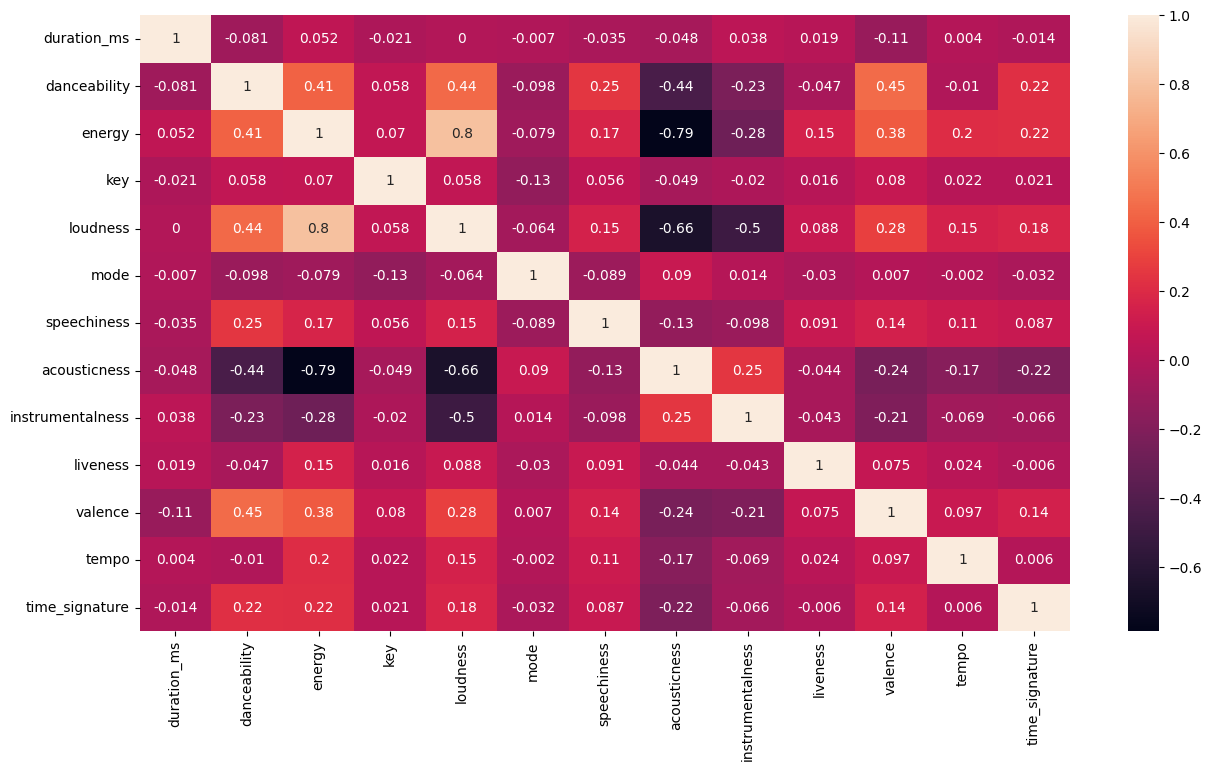

In [11]:
numerical = sub_df[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']]
categorical = sub_df[['track_genre']]
plt.figure(figsize=(15,8))
sns.heatmap(numerical.corr().round(3),annot=True)

In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
numerical = pd.DataFrame(scalar.fit_transform(numerical),columns=['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'])
numerical.describe().round(2)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.06,-3.60,-2.27,-1.49,-6.33,-1.29,-0.94,-1.13,-0.37,-1.15,-2.05,-4.12,-8.28
25%,-0.47,-0.67,-0.73,-0.93,-0.37,-1.29,-0.50,-0.95,-0.37,-0.59,-0.80,-0.77,0.25
50%,-0.14,0.08,0.14,-0.08,0.26,0.78,-0.36,-0.31,-0.37,-0.40,-0.02,-0.00,0.25
75%,0.28,0.73,0.81,0.76,0.66,0.78,-0.01,0.99,-0.36,0.29,0.79,0.58,0.25
max,28.15,2.35,1.76,1.61,2.05,0.78,10.60,1.70,3.72,5.73,2.00,4.36,2.38


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(numerical,categorical,test_size=0.5,random_state=1)
len(x_train),len(x_test), len(y_train), len(y_test)

(7500, 7500, 7500, 7500)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
y_train = encoder.fit_transform(y_train)
#y_test = encoder.fit_transform(y_test)
y_test = encoder.transform(y_test)

/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
regressor = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=1)
#multi_class='ovr', solver='lbfgs', random_state=1

In [17]:
regressor.fit(x_train,y_train)

/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=1)

In [18]:
predictions = regressor.predict(x_test)
print((regressor.score(x_test,y_test))*100)

34.13333333333333


In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      0.37      0.30       509
           1       0.22      0.10      0.14       488
           2       0.80      0.78      0.79       527
           3       0.24      0.27      0.26       489
           4       0.33      0.48      0.39       518
           5       0.28      0.46      0.35       490
           6       0.42      0.32      0.36       481
           7       0.21      0.19      0.20       473
           8       0.31      0.26      0.28       494
           9       0.35      0.31      0.33       514
          10       0.14      0.02      0.04       508
          11       0.41      0.41      0.41       508
          12       0.17      0.07      0.10       524
          13       0.24      0.37      0.29       493
          14       0.47      0.71      0.57       484

    accuracy                           0.34      7500
   macro avg       0.32      0.34      0.32      7500
weighted avg       0.32   

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=85)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=85)

In [22]:
knn_pred = knn.predict(x_test)
print(knn.score(x_test,y_test)*100)
print(classification_report(y_test,knn_pred))

33.093333333333334
              precision    recall  f1-score   support

           0       0.25      0.30      0.27       509
           1       0.35      0.11      0.17       488
           2       0.87      0.73      0.79       527
           3       0.21      0.33      0.25       489
           4       0.33      0.41      0.36       518
           5       0.22      0.54      0.32       490
           6       0.45      0.26      0.33       481
           7       0.21      0.14      0.17       473
           8       0.35      0.25      0.29       494
           9       0.29      0.25      0.27       514
          10       0.23      0.08      0.12       508
          11       0.37      0.42      0.39       508
          12       0.26      0.15      0.19       524
          13       0.28      0.30      0.29       493
          14       0.48      0.67      0.56       484

    accuracy                           0.33      7500
   macro avg       0.34      0.33      0.32      7500
weighte

In [23]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

KeyboardInterrupt: 

Text(0, 0.5, 'Error Rate')

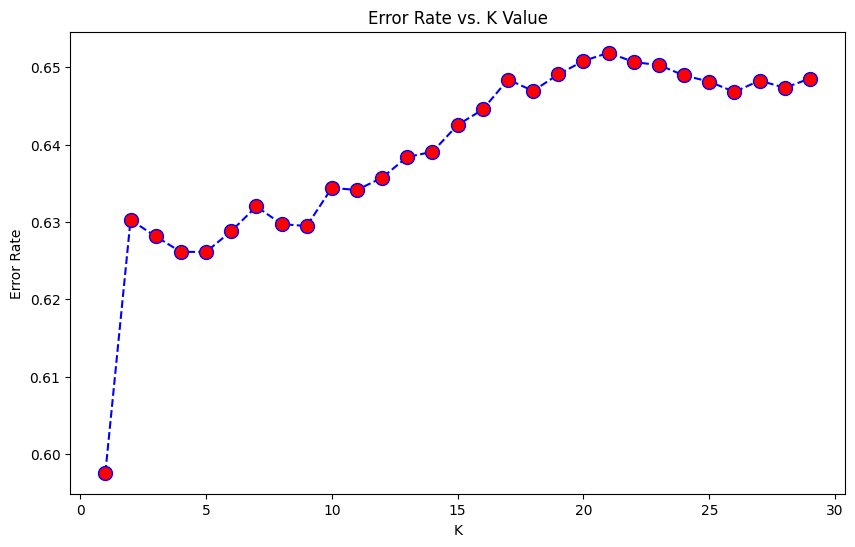

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')